In [6]:
# In Target 0 indicates no heart disease and 1 indicates  a heart disease

In [13]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [16]:
# importing the dataset
df = pd.read_csv("HeartAttackDataSet.csv")
# Viewing top 5 rows of the datset 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0.23
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0.37
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0.24
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0.28
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0.21


# Analyzing the Data

In [17]:
#size of the datset
df.shape

(1025, 14)

In [11]:
# checking the basisc statistics about the data
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [15]:
# check if any data is null 
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

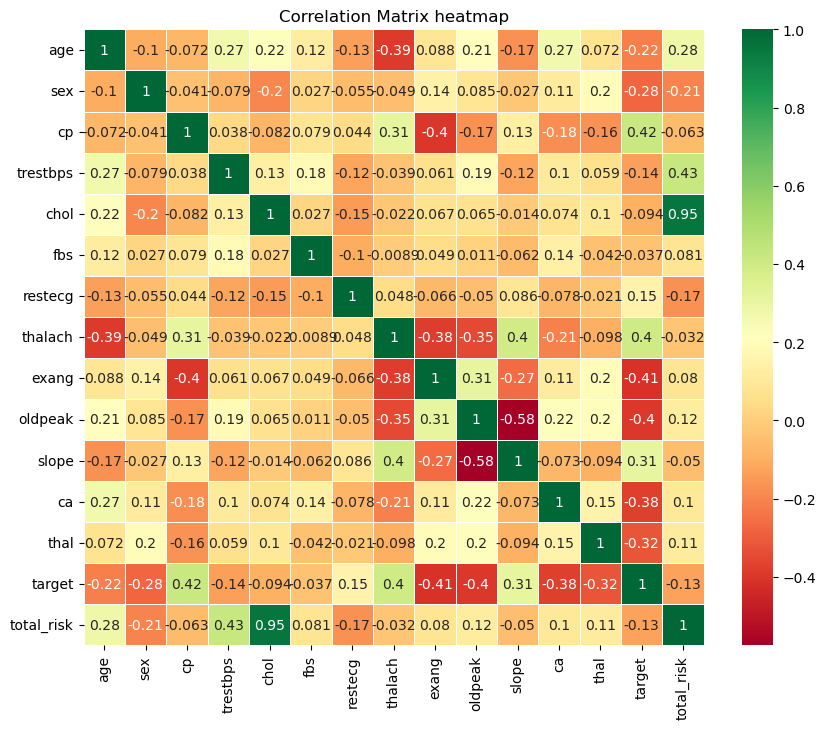

In [29]:
correlation_matrix=df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=.5)
plt.title('Correlation Matrix heatmap')
plt.show()

#Some observations from above correlation Data Before Any Change(PreProcessing in the dataset)
Chest Pain Type (cp): Strong positive correlation (0.42) suggests certain types of chest pain strongly indicate heart disease presence.

Maximum Heart Rate Achieved (thalach): Strong negative correlation (-0.41) indicates lower maximum heart rates during exercise are associated with higher likelihood of heart disease.

Exercise Induced Angina (exang): Strong positive correlation (0.41) implies presence of exercise-induced angina significantly increases likelihood of heart disease.

Number of Major Vessels (ca): Moderate negative correlation (-0.38) suggests more major vessels colored by fluoroscopy relates to lower likelihood of heart disease.

Oldpeak: Moderate negative correlation (-0.40) implies higher ST depression during exercise relative to rest increases likelihood of heart disease.

Slope: Moderate positive correlation (0.31) indicates certain patterns of peak exercise ST segment slope are associated with higher likelihood of heart disease.

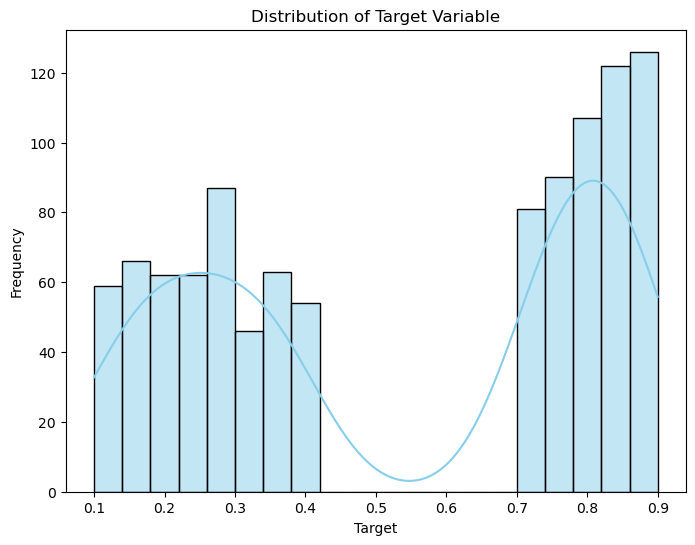

In [19]:
#checking the distribution of the Tarrget column
plt.figure(figsize=(8, 6))
sns.histplot(df['target'], kde=True, color='skyblue', bins=20)
plt.title('Distribution of Target Variable')
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

# Analysing the Numerical Features 

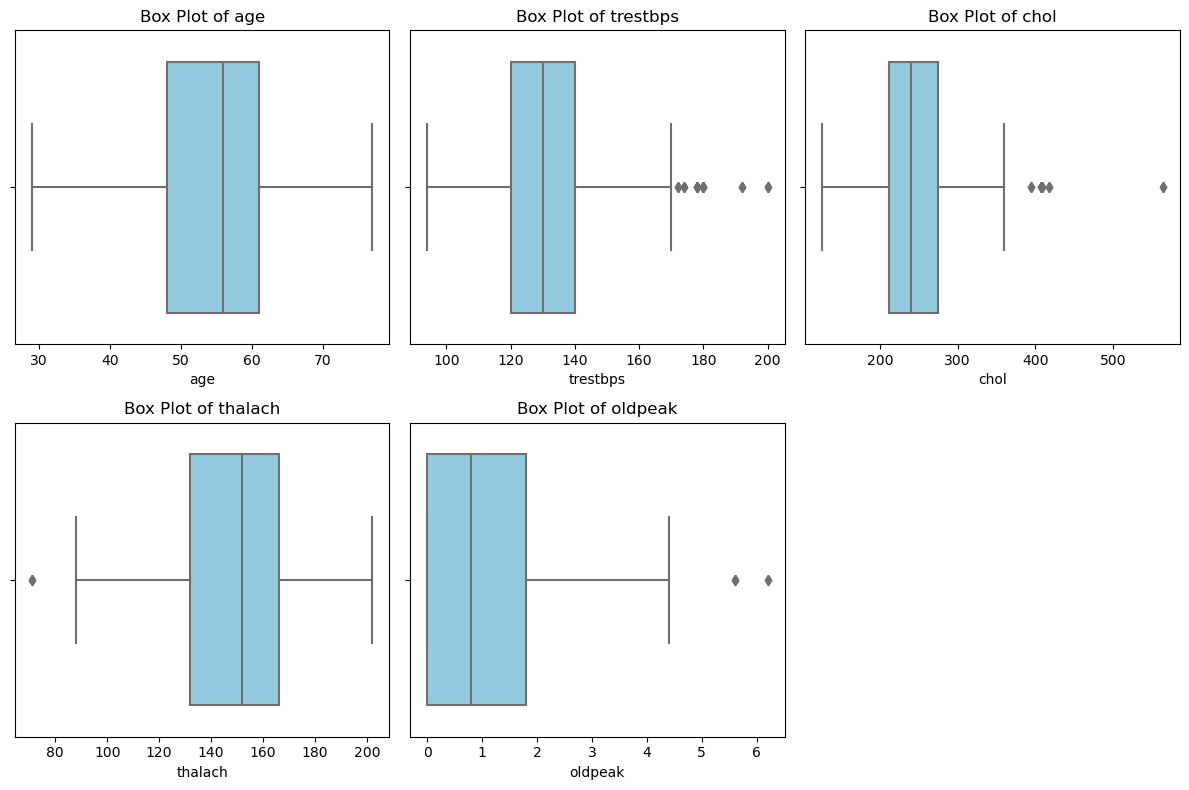

In [23]:
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[feature], color='skyblue')
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

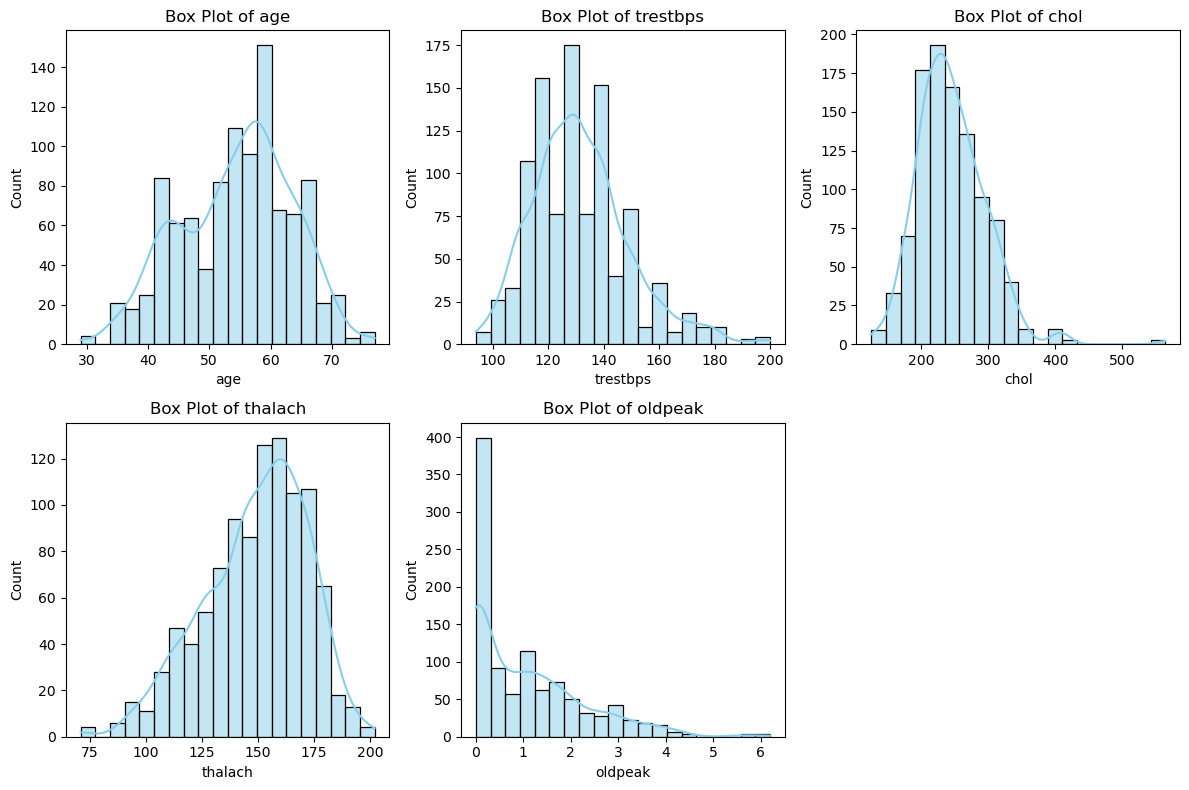

In [22]:
# Create box plots for each numerical feature
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[feature], kde=True, color='skyblue', bins=20)
    plt.title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

The centre of distribution chol & oldpeak is positively skewed, because the whisker and half-box are longer on the right side of the median than on the left side. Distribution of trestbps is approximately symmetric, because both half-boxes are almost the same length. It’s the most concentrated distribution because the interquartile range. The centre of distribution thalach & age is negatively skewed because the whisker and half-box are longer on the left side of the median than on the right side.

In [26]:
#Create age categories such as 'Young', 'Middle-aged', and 'Senior' based on different age ranges.
bins = [29, 45, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [28]:
#Combine 'trestbps' (Resting Blood Pressure) and 'chol' (Serum Cholesterol) to create a new feature representing the total cardiovascular risk.
df['total_risk'] = df['trestbps'] + df['chol']

Combine 'exang' (Exercise induced angina) and 'thalach' (Maximum heart rate achieved) to create a binary indicator for exercise-induced angina when the heart rate is above a certain threshold.

In [34]:
threshold_heart_rate = 150
df['exercise_angina'] = (df['exang'] == 1) & (df['thalach'] > threshold_heart_rate)

Calculate the ratio of total cholesterol to high-density lipoprotein (HDL) as an additional cardiovascular risk factor.

In [35]:
df['cholesterol_hdl_ratio'] = df['chol'] / df['thalach']

Converting the target values into 1 and 0 for using in machine learning model

In [36]:
df['target'] = df['target'].apply(lambda x: 1 if x >= 0.5 else 0)

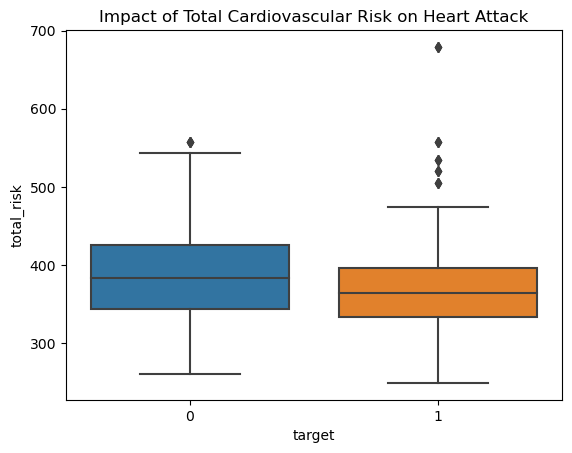

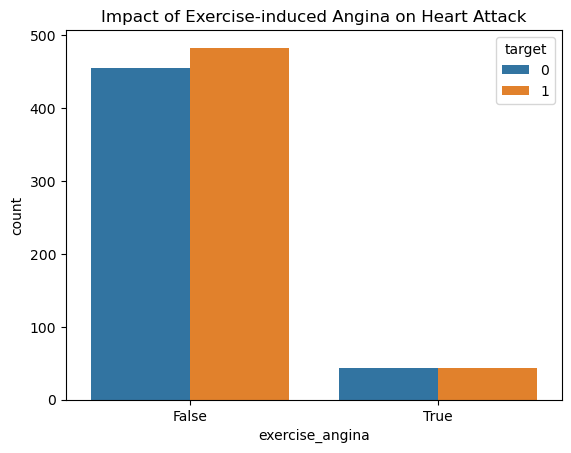

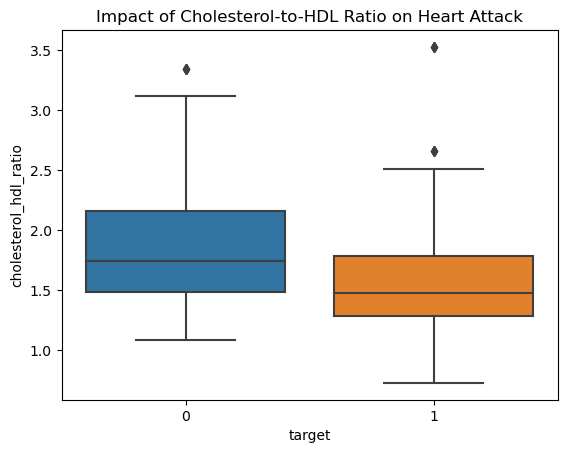

In [37]:
sns.boxplot(x='target', y='total_risk', data=df)
plt.title('Impact of Total Cardiovascular Risk on Heart Attack')
plt.show()

sns.countplot(x='exercise_angina', hue='target', data=df)
plt.title('Impact of Exercise-induced Angina on Heart Attack')
plt.show()

sns.boxplot(x='target', y='cholesterol_hdl_ratio', data=df)
plt.title('Impact of Cholesterol-to-HDL Ratio on Heart Attack')
plt.show()

In [38]:
df.sample(7)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_category,total_risk,cholesterol_hdl_ratio,exercise_angina
749,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1,Middle-aged,345,1.527778,False
814,62,1,1,128,208,1,0,140,0,0.0,2,0,2,1,Senior,336,1.485714,False
413,70,1,0,130,322,0,0,109,0,2.4,1,3,2,0,Senior,452,2.954128,False
237,57,1,1,124,261,0,1,141,0,0.3,2,0,3,0,Middle-aged,385,1.851064,False
1001,42,1,0,140,226,0,1,178,0,0.0,2,0,2,1,Young,366,1.269663,False
626,58,1,2,132,224,0,0,173,0,3.2,2,2,3,0,Middle-aged,356,1.294798,False
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0,Middle-aged,458,1.811321,False


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
X = df[['age', 'sex', 'chol', 'trestbps', 'thalach', 'exang', 'oldpeak']]
y = df['target']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
Lr_model = LogisticRegression(random_state=42)

# Train the model on the training set
Lr_model.fit(X_train_scaled, y_train)

# Make predictions on the testing set
y_pred = Lr_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.75

Confusion Matrix:
[[74 28]
 [23 80]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.73      0.74       102
           1       0.74      0.78      0.76       103

    accuracy                           0.75       205
   macro avg       0.75      0.75      0.75       205
weighted avg       0.75      0.75      0.75       205



Confusion Matrix:

True Positive (TP): 80 cases where the model correctly predicted positive outcomes. True Negative (TN): 74 cases where the model correctly predicted negative outcomes. False Positive (FP): 28 cases where the model incorrectly predicted positive outcomes. False Negative (FN): 23 cases where the model incorrectly predicted negative outcomes. Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positives. In your case, precision for class 0 is 0.76, and for class 1 is 0.74.

Recall (Sensitivity): Recall is the ratio of correctly predicted positive observations to all the observations in the actual class. In your case, recall for class 0 is 0.73, and for class 1 is 0.78.

F1-Score: The F1-score is the weighted average of precision and recall. It balances precision and recall. In your case, the weighted average F1-score is 0.75.